<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Cancer_Prediction_Logistic_Regression_Practice/Cancer_Prediction_Logistic_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('cancer_data.csv')

# Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# Cleaning


In [64]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [65]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [67]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

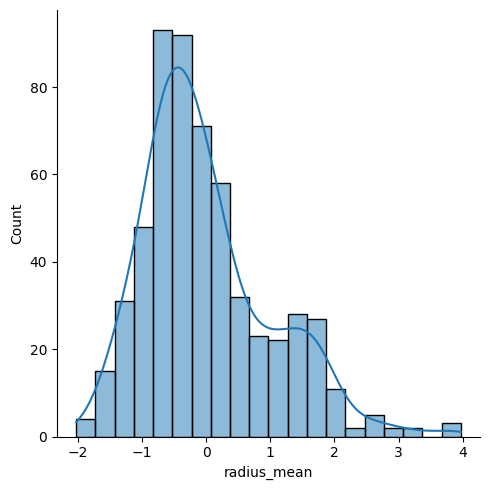

In [75]:
sns.displot(X['radius_mean'], kde=True, bins=20)

# Data Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [93]:
model.coef_

array([[ 0.43464701,  0.39719369,  0.39606985,  0.46999027,  0.06739432,
        -0.52671658,  0.80767618,  1.1077114 , -0.24153785, -0.07844689,
         1.25057276, -0.1889927 ,  0.58988574,  0.91987672,  0.31656977,
        -0.66906627, -0.17107672,  0.31431731, -0.50499861, -0.61176062,
         0.87394431,  1.35751246,  0.58604724,  0.83803013,  0.54737794,
        -0.00589749,  0.95168648,  0.78040785,  1.19559714,  0.16293183]])

In [97]:
coefficients = pd.DataFrame(model.coef_.reshape(-1,1), X.columns, columns=['Coefficient'])

In [103]:
coefficients

,Coefficient
radius_mean,0.434647
texture_mean,0.397194
perimeter_mean,0.396070
area_mean,0.469990
smoothness_mean,0.067394
compactness_mean,-0.526717
concavity_mean,0.807676
concave points_mean,1.107711
symmetry_mean,-0.241538
fractal_dimension_mean,-0.078447


## Predictions

In [81]:
predictions = model.predict(X_test)

In [83]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

## Accuracy

In [86]:
from sklearn.metrics import accuracy_score

In [91]:
from sklearn.metrics import classification_report

In [87]:
accuracy = accuracy_score(y_test, predictions)

In [92]:
print('Accuracy: ', round(accuracy * 100, 2), '%')
print(classification_report(y_test, predictions))

Accuracy:  97.37 %
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Visualisation

<Axes: xlabel='texture_mean', ylabel='prediction'>

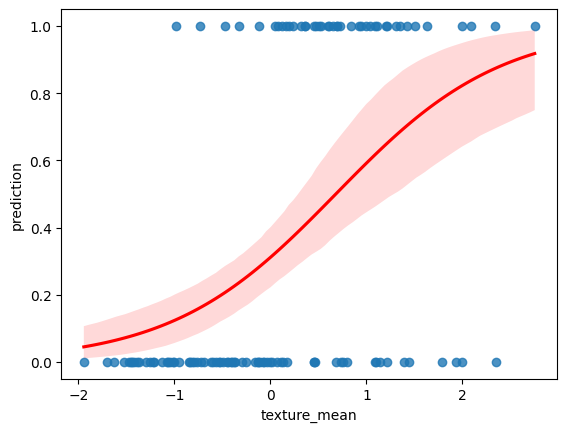

In [106]:
# texture mean has the highest coefficient
sns.regplot(
    data = pd.DataFrame(
        {
            'texture_mean': X_test['texture_mean'],
            'prediction': predictions,
            'actual': y_test
        }
    ),
    logistic=True,
    x='texture_mean',
    y='prediction',
    line_kws={'color': 'red'}
)